In [1]:
import numpy as np
from numpy import random as rn
from numpy import linspace
import matplotlib.pyplot as plt
from numpy import linalg as lg

In [2]:
def XYGenerataor(sample_size:int, normal_noise):
    rn.seed(42)
    Xs= linspace(0,10, sample_size)
    real_slope= 3
    real_intercept =8
    noise= rn.randn(sample_size)*normal_noise
    Ys= real_slope* Xs + real_intercept + noise #ax+b +e
    return Xs, Ys    

In [3]:
x,y = XYGenerataor (50, 5) #x is ordeed

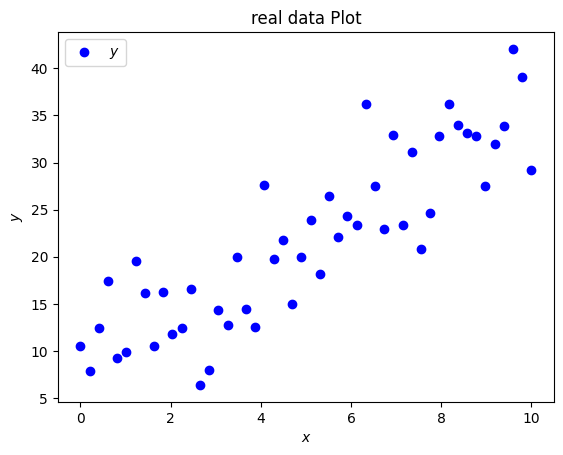

In [4]:
colors = plt.cm.tab10.colors #پالت رنگی تعریف شده
plt.scatter(x, y, color='blue', label='$y$') #scatter #اگر رنگ تعریف نشود هم رنگ ها اتومات تعریف میشوند
plt.title("real data Plot")
plt.xlabel("$x$") #با ادبیات Latex ریاضی مینویسد
plt.ylabel("$y$")
plt.legend()
plt.show()

In [5]:
# y_hat = w.x ---> sumation (y-y_hat)^2 must minimized called sum square error or mean square error(/n)
# this could diviate to some outlier data,  in these cases we should use absolute error as loss function
# nabla()partial derivatives must equals 0 ---> nabla (y-xw)^2 = -2xT.(y-xw) (x is n*m | w is m*1 | y is n*1) n: sample size | m: number of features
# ---> w = (xT.x)^-1.xT.y ---> finding inverse in big data is imposible due to O(n^3) which is guassion complexity
# or may be on account of dependency of features there is no inverse matrix!

# by default any arry is n*1 so:
X = np.c_[np.ones((len(x),1)) , x] # 1 تعداد ستون و c_ concatenate دو ماتریس
def y_hat (x, w):
    return np.dot(x, w.T) # or x@w #actually prediction values


In [6]:
# w calculator
def w_algebric_form(x, y):
    w = lg.inv (x.T @ x) @ x.T @ y 
    return w

In [7]:
w= w_algebric_form(X, y)
print ( w )

[8.32221546 2.710083  ]


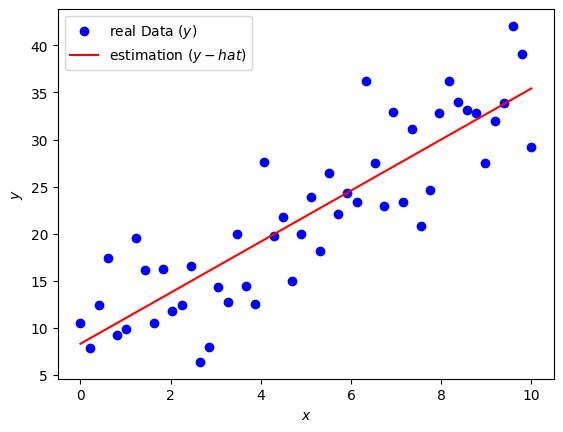

In [8]:
prediction = y_hat(X , w)
def plot_me (x, y ,predict):
    plt.scatter(x, y, color='blue', label='real Data ($y$)')
    plt.plot(x, predict, color='red', label='estimation ($y- hat$)')
    plt.xlabel("$x$")
    plt.ylabel("$y$")
    plt.legend()
    plt.show()
plot_me (x, y, prediction)

In [9]:
x,y = XYGenerataor (50, 5) #x is ordeed

In [10]:
# input one feature, create feature ^0,1,2,... d
def make_polynominal (feature, degree):
    f_poly = np.c_[ np.ones(len(feature)) ]
    for d in range (1, degree+1):
        f_poly = np.c_ [f_poly , feature ** d]
    return f_poly

In [11]:
def poly_regression (x, y ,degree=1):
    x_linear= make_polynominal (x, degree)
    w = w_algebric_form(x_linear, y)
    return x_linear, w

In [12]:
estimation_degree = 10
X, w_poly = poly_regression (x, y , estimation_degree)
print (f"wights for estimation in degree {estimation_degree} are\n {w_poly}")


wights for estimation in degree 10 are
 [ 9.80429613e+00 -2.24790567e+00  2.19261172e+01 -2.30577585e+01
  9.13860117e+00 -1.21348217e+00 -1.72424300e-01  7.95905862e-02
 -1.09235732e-02  6.89863213e-04 -1.70116419e-05]


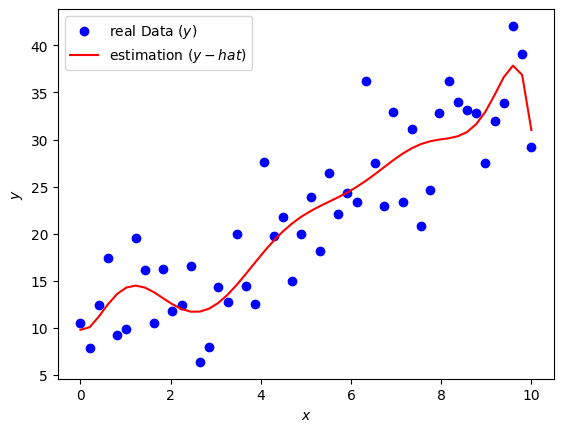

In [13]:
prediction = y_hat (X, w_poly)
plot_me (x, y, prediction)

In [14]:
# RMSE root mean square error
def model_RMSE (y, predict):
    return np.sqrt(np.mean( (y-predict)**2 ))

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (x, y , test_size=0.2, random_state=42) #random_state=x caused a fixed random sample to compare solutions. It acts like random.seed

max_degree = 10
train_rmse , test_rmse, w = [], [], []
for d in range(max_degree):
    X, w_poly = poly_regression (x_train, y_train , d)
    prediction_train = y_hat (X, w_poly)
    
    X_test = make_polynominal (x_test, d)
    prediction_test = y_hat (X_test, w_poly) # !dont use function poly regression for test values
    
    train_rmse.append ( model_RMSE (y_train, prediction_train) )
    test_rmse.append  ( model_RMSE (y_test,  prediction_test)  )
    w.append(w_poly)

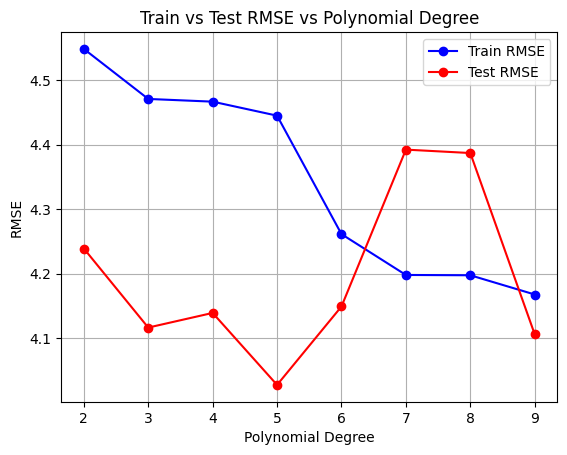

In [16]:
degrees = range (2, max_degree)
i= np.min(degrees)
plt.plot(degrees, train_rmse[i:], marker='o', linestyle='-', color='blue', label='Train RMSE')
plt.plot(degrees, test_rmse[i:],  marker='o', linestyle='-', color='red', label='Test RMSE')
plt.title("Train vs Test RMSE vs Polynomial Degree")
plt.xlabel("Polynomial Degree")
plt.ylabel("RMSE")
plt.xticks(degrees)
plt.grid(True)
plt.legend()
plt.show()

In [42]:

# Gradient descent ------------linear-----------
def J_cost_function (x, y, w):
    return np.sum( (y_hat(x, w) -y)**2 ) / len(x)

def gradient_descsent (x, y, w, learning_rate, num_iteration):
    m = len(x) # number of samples
    cost_hist = []
    X= make_polynominal (x, 1)
    for i in range (num_iteration):
        # update w
        w = np.array(w)
        y_ = y_hat(X, w)
        grad_w = ( X.T @ (y_ -y) ) /m                
        w -= learning_rate * grad_w        
        cost_hist.append ( J_cost_function (X, y, w) ) # because w used in function and is immutable
    return w, cost_hist

In [47]:
x,y = XYGenerataor (50, 5.0) #x is ordeed

# Initialize w as a NumPy array with float64 dtype
w_initial = np.array([0, 0], dtype=np.float64)

eta = 0.05  # Learning rate
num_iters = 500

In [48]:
# Run Gradient Descent
w_final, cost_history = gradient_descsent(x, y, w_initial, eta, num_iters)
print(w_final)#, cost_history, w_history)


[8.30854651 2.71212794]


In [55]:
# regularization # ridge and lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge, Lasso
degrees = [2, 6, 8]
lambdas = [1e4, 1, 1e-4, 1e-8] #lambda --> alpha in models lige ridge

In [72]:
def generate_data(n=100, noise=10.0):
    np.random.seed(42)
    X = np.random.uniform(-10, 10, n)
    y = X**2 - 2 * X + np.random.randn(n) * noise  # x**2 - 2*x + noise
    return X, y

X, y = generate_data(n=20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
# first values for rmse errors
ridge_rmse_train = np.zeros((len(degrees), len(lambdas)))
ridge_rmse_test = np.zeros((len(degrees), len(lambdas)))
lasso_rmse_train = np.zeros((len(degrees), len(lambdas)))
lasso_rmse_test = np.zeros((len(degrees), len(lambdas)))


lasso parameters:[ 0. -0.  0.], 
ridge parameters:[ 0.         -0.13952825  0.60532349]

lasso parameters:[ 0.         -2.19220901  1.00727026], 
ridge parameters:[ 0.         -2.21542519  1.00765113]

lasso parameters:[ 0.         -2.21923764  1.00759988], 
ridge parameters:[ 0.         -2.21923965  1.00759993]

lasso parameters:[ 0.         -2.21924003  1.00759992], 
ridge parameters:[ 0.         -2.21924003  1.00759992]


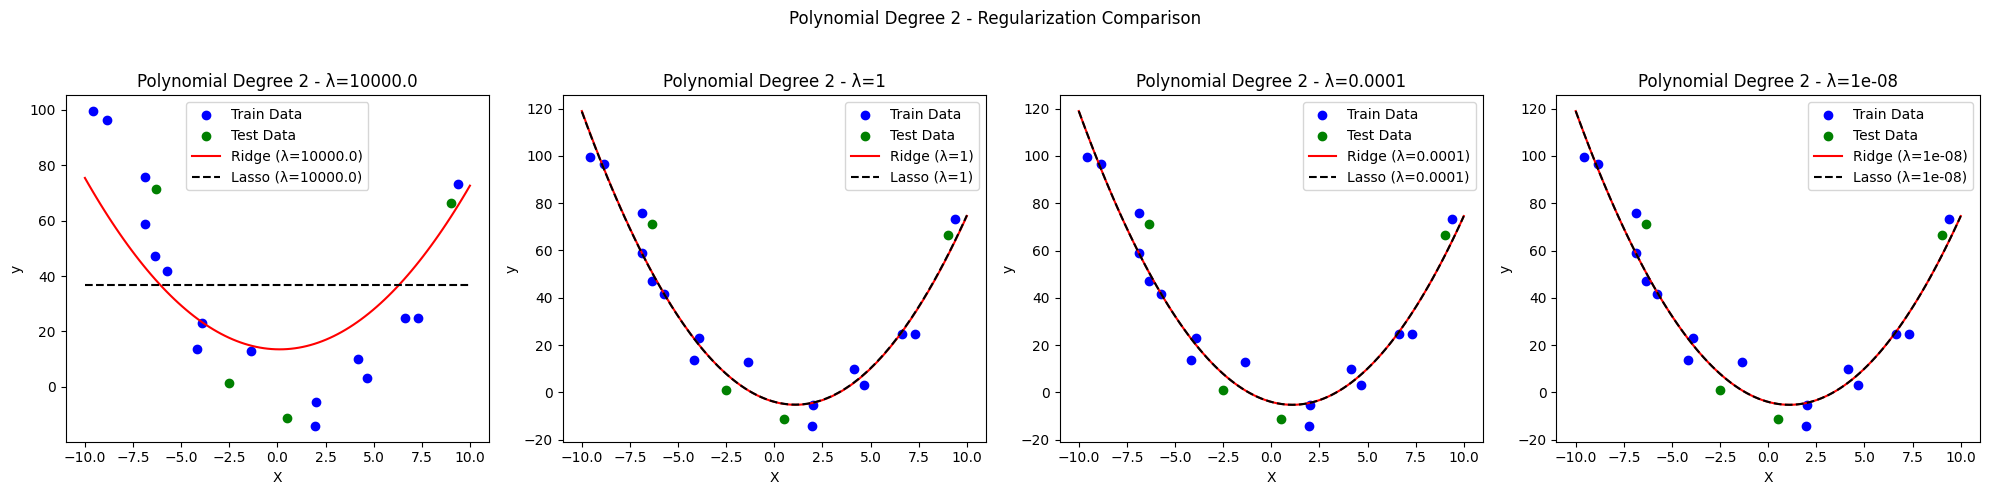


lasso parameters:[ 0.         -0.          0.         -0.          0.         -0.00027564
  0.00010257], 
ridge parameters:[ 0.         -0.00885678  0.00907984 -0.10923527  0.02762656  0.00104579
 -0.00019197]

lasso parameters:[ 0.00000000e+00 -1.17942681e+00  4.10002703e-01 -7.35992128e-02
  1.65095035e-02  7.96371023e-04 -1.13426695e-04], 
ridge parameters:[ 0.00000000e+00 -1.71511802e+00  4.80156203e-01 -5.36816536e-02
  1.45862124e-02  6.37891372e-04 -1.00106901e-04]

lasso parameters:[ 0.00000000e+00 -1.78665657e+00  4.78246927e-01 -5.10199998e-02
  1.46323911e-02  6.16674873e-04 -1.00433927e-04], 
ridge parameters:[ 0.00000000e+00 -1.78670985e+00  4.78253953e-01 -5.10180190e-02
  1.46321985e-02  6.16659112e-04 -1.00432593e-04]

lasso parameters:[ 0.00000000e+00 -1.78671731e+00  4.78253741e-01 -5.10177416e-02
  1.46322037e-02  6.16656901e-04 -1.00432630e-04], 
ridge parameters:[ 0.00000000e+00 -1.78671731e+00  4.78253738e-01 -5.10177413e-02
  1.46322038e-02  6.16656898e-04 -1.00

C:\Users\mr.rahimy\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=9.95034e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\mr.rahimy\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=9.95034e-21): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\mr.rahimy\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.420e+02, tolerance: 1.878e+00
  model = cd_fast.enet_coordinate_descent(


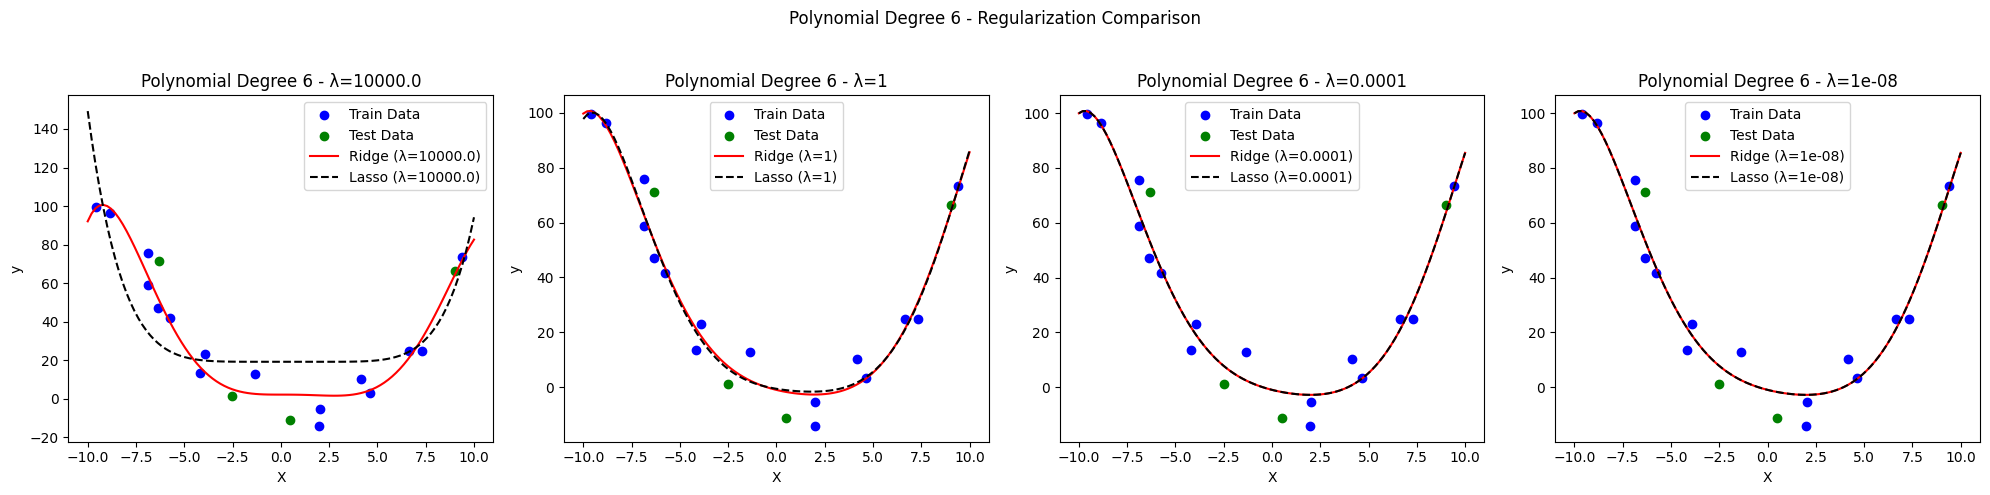


lasso parameters:[ 0.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -2.06402578e-03  5.40434742e-04  2.10178939e-05
 -4.81456356e-06], 
ridge parameters:[ 0.00000000e+00 -8.41820274e-03  3.14789961e-03 -4.05022086e-02
  4.56772914e-02 -1.40593323e-03 -7.31594512e-04  1.91099982e-05
  3.83936560e-06]

lasso parameters:[ 0.00000000e+00 -3.22010211e+00  1.91612784e-01  1.35991243e-01
  3.51676135e-02 -4.37419178e-03 -5.53109432e-04  3.46977903e-05
  2.89469845e-06], 
ridge parameters:[ 0.00000000e+00 -6.33774101e+00 -6.33182003e-01  4.20465947e-01
  8.66214363e-02 -1.10253250e-02 -1.58910393e-03  7.81220288e-05
  9.16928905e-06]

lasso parameters:[ 0.00000000e+00 -4.96023656e+00  3.11367671e-01  2.65896143e-01
  3.27425284e-02 -7.10233158e-03 -5.65753340e-04  5.14422855e-05
  3.18500469e-06], 
ridge parameters:[ 0.00000000e+00 -7.26402752e+00 -8.05439333e-01  4.95707112e-01
  9.67288146e-02 -1.26894127e-02 -1.78865258e-03  8.86684456e-05
  1.03690221e-05]



C:\Users\mr.rahimy\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.160e+02, tolerance: 1.878e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\mr.rahimy\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_ridge.py:215: LinAlgWarning: Ill-conditioned matrix (rcond=1.21211e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\mr.rahimy\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.300e+02, tolerance: 1.878e+00
  model = cd_fast.enet_coordinate_desce

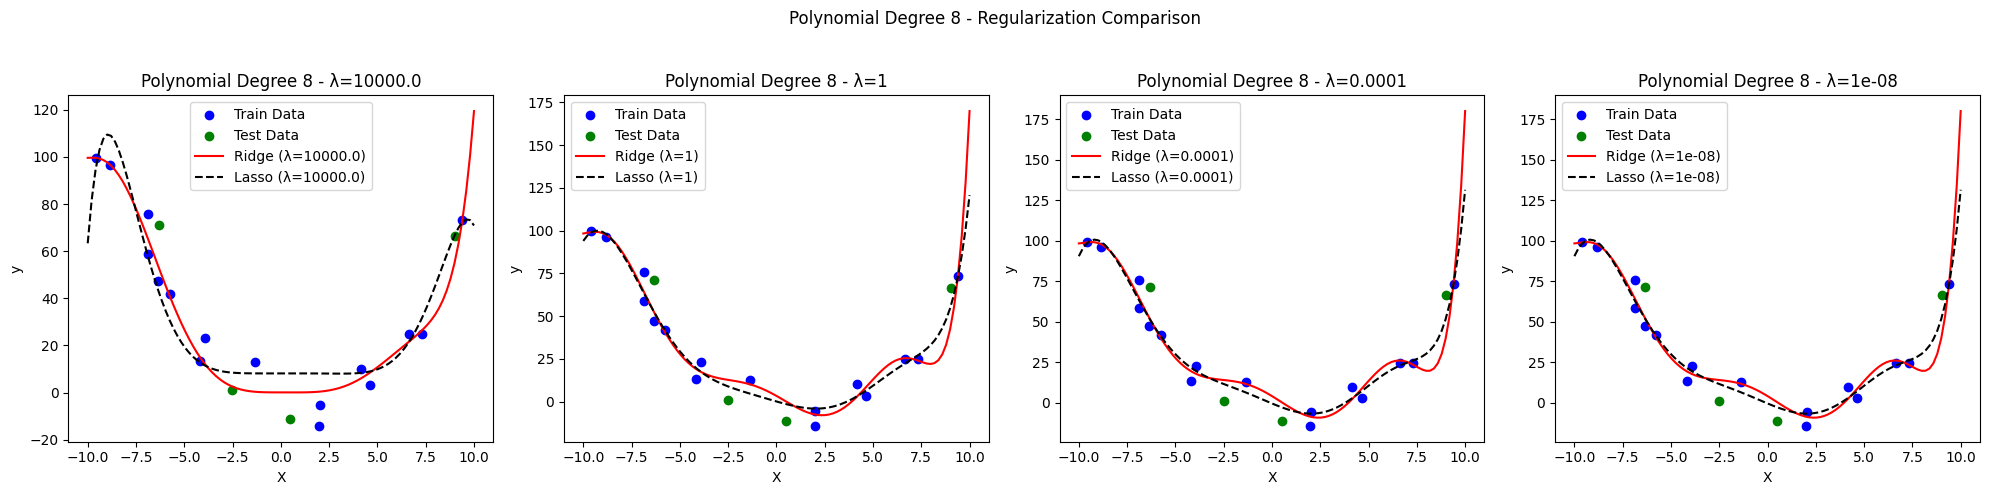

In [ ]:
for degree_idx, degree in enumerate(degrees):
    fig, axs = plt.subplots(1, 4, figsize=(20, 5))  # Create a 1x4 grid of subplots
    for lambda_idx, lambda_val in enumerate(lambdas):
        poly_features = PolynomialFeatures(degree=degree) # from sci-kit, make features polynominal
        X_train_poly = poly_features.fit_transform(X_train[:, np.newaxis]) #newaxis: even if a feature is avalable, sci-kit learn needs 2d array
        X_test_poly = poly_features.transform(X_test[:, np.newaxis]) 
        
        # Ridge Regression using scikit-learn
        ridge_model = Ridge(alpha=lambda_val)
        ridge_model.fit(X_train_poly, y_train)
        y_train_pred_ridge = ridge_model.predict(X_train_poly)
        y_test_pred_ridge = ridge_model.predict(X_test_poly)

        # Lasso Regression using scikit-learn
        lasso_model = Lasso(alpha=lambda_val, max_iter=10000) # max_iter is more important than ridge and sometimes the default value=1000 is not enough
        lasso_model.fit(X_train_poly, y_train)
        y_train_pred_lasso = lasso_model.predict(X_train_poly)
        y_test_pred_lasso = lasso_model.predict(X_test_poly)

        ridge_rmse_train[degree_idx, lambda_idx] = model_RMSE(y_train, y_train_pred_ridge)
        ridge_rmse_test[degree_idx, lambda_idx] = model_RMSE(y_test, y_test_pred_ridge)
        lasso_rmse_train[degree_idx, lambda_idx] = model_RMSE(y_train, y_train_pred_lasso)
        lasso_rmse_test[degree_idx, lambda_idx] = model_RMSE(y_test, y_test_pred_lasso)
        
        # the three below lines indicate model coefficents (w0,w1,...)
        lasso_parameters=  lasso_model.coef_
        ridge_parameters=  ridge_model.coef_
        print (f'\nlasso parameters:{lasso_parameters}, \nridge parameters:{ridge_parameters}')


        # Plot the fitted curves for both Ridge and Lasso
        X_plot = np.linspace(-10, 10, 100)
        X_plot_poly = poly_features.transform(X_plot[:, np.newaxis])

        y_plot_ridge = ridge_model.predict(X_plot_poly)
        y_plot_lasso = lasso_model.predict(X_plot_poly)
        
        ax = axs[lambda_idx]
        ax.scatter(X_train, y_train, color='blue', label='Train Data')
        ax.scatter(X_test, y_test, color='green', label='Test Data')
        ax.plot(X_plot, y_plot_ridge, color='red', label=f'Ridge (λ={lambda_val})')
        ax.plot(X_plot, y_plot_lasso, color='black', linestyle='--', label=f'Lasso (λ={lambda_val})')
        ax.set_title(f'Polynomial Degree {degree} - λ={lambda_val}')
        ax.set_xlabel('X')
        ax.set_ylabel('y')
        ax.legend()

    plt.suptitle(f'Polynomial Degree {degree} - Regularization Comparison')
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

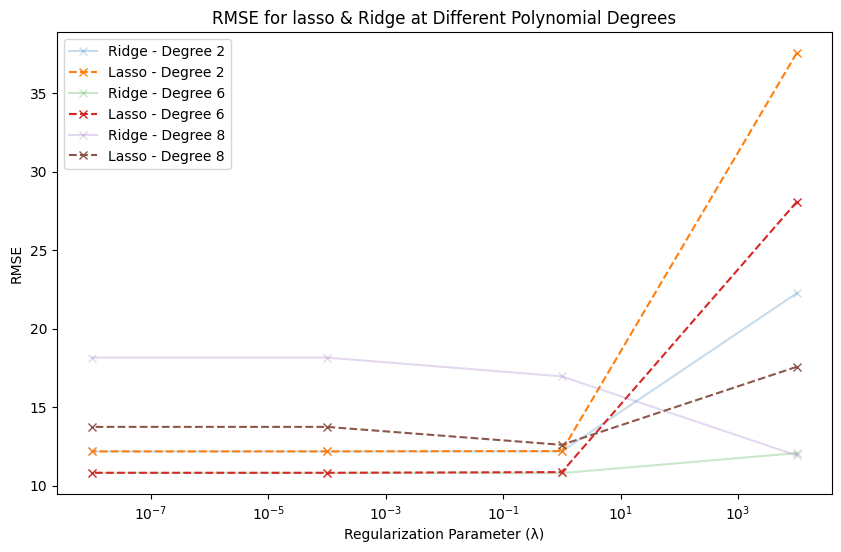

In [80]:
# plot RMSE
plt.figure(figsize=(10, 6))

for degree_idx, degree in enumerate(degrees):
    plt.plot(lambdas, ridge_rmse_test[degree_idx], marker='x', label=f'Ridge - Degree {degree}', alpha=0.25) # alpha reduce opacity
    plt.plot(lambdas, lasso_rmse_test[degree_idx], marker='x', linestyle='--' ,label=f'Lasso - Degree {degree}')
plt.xscale('log') # required for this type log (lambda)
plt.xlabel('Regularization Parameter (λ)')
plt.ylabel('RMSE')
plt.title('RMSE for lasso & Ridge at Different Polynomial Degrees')
plt.legend()
plt.show()